## Linear Algebra

Linear algebra refers to the study of linear relationships. In this class, we will cover some basic concepts of linear algebra that are needed to understand some more advanced and *practical* concepts and definitions. If you are interested in the concepts related to linear algebra and application, there is an excellent online series that covers these topics in detail 

https://github.com/fastai/numerical-linear-algebra


Linear algebra is a fundamental component of machine learning, so if you are interested in using machine learning in the future go and check that class. 


### Vectors

A vector is a collection of numbers. Vectors can be **row vectors** or **column vectors** depending on their orientation. In general, you can assume that a vector is a **column vector** unless otherwise stated. 


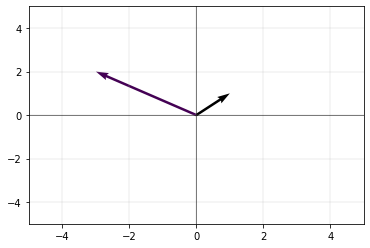

In [5]:
#we are used to 2d vectors
import numpy as np
import matplotlib.pyplot as plt
vector1 = np.array([[1,1]])
vector2 = np.array([[-3,2]])
plt.quiver(0,0,*vector1[0], angles='xy', scale_units='xy', scale=1)
plt.quiver(0,0,*vector2[0],vector2[0,1], angles='xy', scale_units='xy', scale=1, color='red')
plt.axhline(y=0, color="black", lw=0.5)
plt.axvline(x=0, color="black", lw=0.5)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.grid(lw=0.25)
plt.show()

In [6]:
import numpy as np
vector_row = np.array([[1, -5, 3, 2, 4]])
vector_column = np.array([[1], 
                          [2], 
                          [3], 
                          [4]])

print(vector_row.shape)
print(vector_column.shape)

(1, 5)
(4, 1)


The transpose ($T$) of a vector is an operation that transform a column vector into a row vector and a row vector into a column vector. If $v$ is a vector, then $v^{T}$ is the transpose.

In [8]:
m = np.array([[1, -5, 3, 2, 4],[3,5,2,6,8]])
m.shape, m.T.shape

((2, 5), (5, 2))

The norm of a vector is a measure of its lenght. There are many ways to measure lenght and you can use different definitions depending on the application. The most common norm is the $L_2$ norm, if $v$ is a vector, then the $L_2$ norm ($\Vert v \Vert_{2}$) is 

$$
\Vert v \Vert_{2} = \sqrt{\sum_i v_i^2}
$$

This is also known as the Euclidian norm. 

Others well known norms are the $L_1$ norm (or Manhattan Distance), and the $L_\infty$ norm (or infinity norm) equal to the maximum absolut value of the vector 

In [9]:
from numpy.linalg import norm
new_vector = vector_row.T
norm_1 = norm(new_vector, 1)
norm_2 = norm(new_vector, 2)
norm_inf = norm(new_vector, np.inf)
print('L_1 is: %.1f'%norm_1)
print('L_2 is: %.1f'%norm_2)
print('L_inf is: %.1f'%norm_inf)

L_1 is: 15.0
L_2 is: 7.4
L_inf is: 5.0


The **dot product**  of two vectors is the sum of the product of the respective elements in each vector and is denoted by $\cdot$. If $v$ and $w$ are vectors, then the dot product is defined as 
$$
d = v \cdot w= \sum_{i = 1}^{n} v_iw_i
$$

alternatively, the dot product can be computed as 

$$
v \cdot w = \Vert v \Vert_{2} \Vert w \Vert_{2} \cos{\theta}
$$

where $\theta$ is the angle between the vectors. In the same way, the angle between two vector can be computed as 

$$
\theta = cos^{-1}\left[\frac{v \cdot w }{\Vert v \Vert_{2} \Vert w \Vert_{2}}\right]
$$

In [15]:
#lets take two vectors that are on the same direction but have different lenghts 
from numpy import arccos, dot, pi
v = np.array([[5,3]])
w = np.array([[-2,2]])
theta = arccos((v@w.T)/(norm(v)*norm(w)))
theta*(180/pi) #arcos return gradients, we are convering to degrees

array([[104.03624347]])

In [17]:
#lets take two vectors that are on opposite directions 
from numpy import arccos, dot, pi
v = np.array([[1,2]])
w = np.array([[-1,-2]])
theta = arccos((v@w.T)/(norm(v)*norm(w)))
theta*(180/pi) #arcos return gradients, we are convering to degrees 

array([[179.99999879]])

In [18]:
#lets take two vectors that are on orthogonal to eachother 
from numpy import arccos, dot, pi
v = np.array([[1,1]])
w = np.array([[-1,1]])
theta = arccos(v.dot(w.T)/(norm(v)*norm(w)))
theta*(180/pi) #arcos return gradients, we are convering to degrees 

array([[90.]])

The **cross product** between two vectors, $v$ and $w$, is written $v\times w$. It is defined by 

$$
v \times w = \Vert v \Vert_{2}\Vert w \Vert_{2}\sin{(\theta)} 
$$

where $θ$ is the angle between the $v$ and $w$.

The geometric interpretation of the cross product is a vector perpendicular to both $v$ and $w$ with length (as measured by $L_2$) equal to the area enclosed by the parallelogram created by the two vectors.

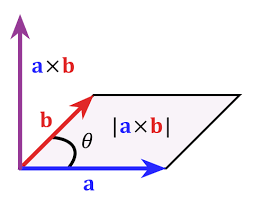

In [19]:
v = np.array([[0, 2, 0]])
w = np.array([[3, 0, 0]])
cross = np.cross(v, w)
print(cross)

[[ 0  0 -6]]


In [26]:
arccos(v.dot(w.T)/(norm(v)*norm(w)))*(180/pi)

array([[90.]])

In [23]:

arccos(v.dot(cross.T)/(norm(v)*norm(cross)))*(180/pi)

array([[90.]])

In [24]:
arccos(w.dot(cross.T)/(norm(w)*norm(cross)))*(180/pi)

array([[90.]])

### Matrices 

An $n \times m $ matrix is a rectangular table of numbers consisting of $m$ rows and $n$ columns.

The norm of a matrix can be consider as a kind of vector norm by alingming the $n * m$ elements of the matrix into a single vector
$$
\Vert M \Vert_{p} = \sqrt[p]{(\sum_i^m \sum_j^n |a_{ij}|^p)}
$$

where $p$ defines the norm order ($p=0, 1, 2,...$)


**Matrix multiplication** between two matrices, $P$ and $Q$, is defined when $P$ is an $m \times p$ matrix and $Q$ is a $p \times n$ matrix. The result of $M=PQ$ is a matrix $M$ that is $m \times n$. The dimension with size $p$ is called the inner matrix dimension, and the inner matrix dimensions must match (i.e., the number of columns in $P$ and the number of rows in $Q$ must be the same) for matrix multiplication. The dimensions $m$ and $n$ are called the outer matrix dimensions. Formally,  $M=PQ$ is defined as
$$
M_{ij} = \sum_{k=1}^p P_{ik}Q_{kj}
$$


In [34]:
P = np.array([[1, 7], [2, 3], [5, 0]])
Q = np.array([[2, 6, 3, 1], [1, 2, 3, 4]])
print(P)
print(f'The dimensions of P are: {P.shape}')
print(Q, Q.shape)
print(f'The dimensions of Q are: {Q.shape}')
print(P@Q)
print(f'The dimensions of PxQ are: {np.dot(P, Q).shape}')

[[1 7]
 [2 3]
 [5 0]]
The dimensions of P are: (3, 2)
[[2 6 3 1]
 [1 2 3 4]] (2, 4)
The dimensions of Q are: (2, 4)
[[ 9 20 24 29]
 [ 7 18 15 14]
 [10 30 15  5]]
The dimensions of PxQ are: (3, 4)


In [38]:
#what will happend here? 
np.matmul(P,Q)

array([[ 9, 20, 24, 29],
       [ 7, 18, 15, 14],
       [10, 30, 15,  5]])

The **determinant** is an important property of square matrices (same number of rows and columns). The determinant is denoted by $\det(M)$ or $|M|$.

In the case of $2 \times 2$ matrices, the determinant is 
$$
\begin{split}
|M| = \begin{bmatrix}
a & b \\
c & d\\
\end{bmatrix} = ad - bc\end{split}
$$


In the case of $3 \times 3$ matrices, the determinant is 
$$
\begin{split}
\begin{eqnarray*}
|M| = \begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & i \\
\end{bmatrix} & = & a\begin{bmatrix}
\Box &\Box  &\Box  \\
\Box & e & f \\
\Box & h & i \\
\end{bmatrix} - b\begin{bmatrix}
\Box &\Box  &\Box  \\
d & \Box & f \\
g & \Box & i \\
\end{bmatrix}+c\begin{bmatrix}
\Box &\Box  &\Box  \\
d & e & \Box \\
g & h & \Box \\
\end{bmatrix} \\
&&\\
& = & a\begin{bmatrix}
e & f \\
h & i \\
\end{bmatrix} - b\begin{bmatrix}
d & f \\
g & i \\
\end{bmatrix}+c\begin{bmatrix}
d & e \\
g & h \\
\end{bmatrix} \\ 
&&\\
& = & aei + bfg + cdh - ceg - bdi - afh
\end{eqnarray*}\end{split}
$$


Computing the determinant or larger matrices is cumbersome. However, the process can be easily automated and always reduced to computing the determinant of $2 \times 2$ matrices. Numpy includes an efficient method to compute the determinant of a matrix

In [45]:
from numpy.linalg import det

M = np.array([[0,2,1,3,0], 
              [3,2,8,1,6.01], 
              [1,0,0,3,2.02],
              [0,3,2,1,0],
              [1,0,0,3,2.04]])
print(f'M: {M}')

print(f'Determinant: {det(M):0.2f}') #note that the :0.2f limits the number of decimals printed!


M: [[0.   2.   1.   3.   0.  ]
 [3.   2.   8.   1.   6.01]
 [1.   0.   0.   3.   2.02]
 [0.   3.   2.   1.   0.  ]
 [1.   0.   0.   3.   2.04]]
Determinant: -0.76


The inverse of a square matrix $M$ is a matrix of the same size, $N$, such that $M \bullet N=I$, Where $I$ is a matrix with only ones in its diagonal (unity matrix). The inverse of a matrix $M$ is denoted as $M^{-1}$. For a $2 \times 2$ matrix, the inverse is defined as 

$$
\begin{split}
M^{-1} = \begin{bmatrix}
a & b \\
c & d\\
\end{bmatrix}^{-1} = \frac{1}{|M|}\begin{bmatrix}
d & -b \\
-c & a\\
\end{bmatrix}\end{split}
$$

calculating the inverse of a matrix is a complex process; however, it is an important step in many calculations and several *easier* approaches have been developed.

if the determinant of a matrix is zero, then the matrix doesn't have an inverse. 

In [54]:
from numpy.linalg import inv

M = np.array([[0,2,1,3], 
             [3,2,8,1], 
             [1,0,0,3],
             [0,3,2,1]])
print(f'M: {M}')

print(f'Inverse: {inv(M)}') #note that the :0.2f limits the number of decimals printed!

print(f'M x inv(M) = {np.round((np.matmul(M,inv(M))),10)}')


M: [[0 2 1 3]
 [3 2 8 1]
 [1 0 0 3]
 [0 3 2 1]]
Inverse: [[-1.57894737 -0.07894737  1.23684211  1.10526316]
 [-0.63157895 -0.13157895  0.39473684  0.84210526]
 [ 0.68421053  0.18421053 -0.55263158 -0.57894737]
 [ 0.52631579  0.02631579 -0.07894737 -0.36842105]]
M x inv(M) = [[ 1.  0.  0.  0.]
 [ 0.  1.  0. -0.]
 [ 0.  0.  1. -0.]
 [ 0.  0.  0.  1.]]


A matrix that is close to being singular (i.e., the determinant is close to 0) is called **ill-conditioned**. Although ill-conditioned matrices have inverses, they are problematic numerically in the same way that dividing a number by a very, very small number is problematic. 
The **condition number** is a measure of how ill-conditioned a matrix is, and it can be computed using Numpy’s function cond from linalg. The higher the condition number, the closer the matrix is to being singular.

The **rank** of an $m \times n$ matrix $A$ is the number of linearly independent columns or rows of $A$ (that is, you cannot write a row or column as a linear combination of other rows or columns), and is denoted by **rank(A)**. It can be shown that the number of linearly independent rows is always equal to the number of linearly independent columns for any matrix. A matrix is called full rank. if **rank (A)=min(m,n)**. The matrix, $A$, is also full rank if all of its columns are linearly independent.


In [57]:
from numpy.linalg import cond, matrix_rank

A = np.array([[1,1,0],
              [0,1,0],
              [1,0,2]])

print(f'Condition number: {cond(A)}')
print(f'Rank: {matrix_rank(A)}')

Condition number: 4.087187608076543
Rank: 3


if you append a new columns (or row) to a matrix, the rank will increase if the new columns add new information (that is, the new column cannot be explained by a linear combinantion of existing columns)

In [ ]:
y = np.array([[1], [2], [1]])
A_y = np.concatenate((A, y), axis = 1)
print(f'Augmented matrix: \n {A_y}')
print(f'Rank of augmented matrix: {matrix_rank(A_y)} ')

### Linear Transformations 

You can transform a vector by applying linear operations to it, for examples 

- Sum with a scalar 
- Multiplication with a scalar
- Sum with another vector
- Multiplication with another vector 
- Multiplication with a matrix 

The last operation is one of the most important operation in linear algebra and has many applications. 

Example, **Vector Rotation**

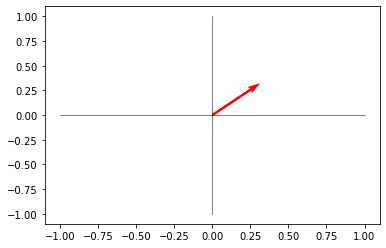

In [59]:
import numpy as np
import matplotlib.pyplot as plt
V = np.array([[3],[2]])
origin = np.array([[0], [0]]) # origin point

plt.quiver(0,0,*V, color=['r'], scale=21)
plt.plot([-1,1],[0,0], lw=0.5, color = 'k')
plt.plot([0,0],[-1,1], lw=0.5, color = 'k')
plt.show()

To rotate a vector by an angle $\theta$, you have to multiply it by a rotation matrix given by 
$$
R = \begin{bmatrix}
\cos(\theta) & -\sin(\theta) \\
\sin(\theta) & \cos(\theta)
\end{bmatrix}
$$

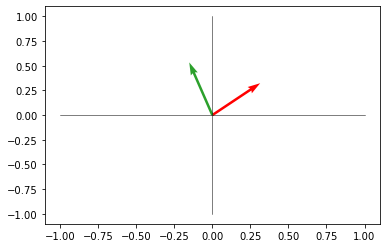

In [60]:
#Rotate the vector by 45 degress
theta = 80 * (np.pi/180)
Rot_Matrix = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])

rot_V = Rot_Matrix @ V

#(2x2) @ (2x1) -> (2x1)
plt.quiver(0,0,*V, color=['r'], scale=21)
plt.quiver(0,0,*rot_V, color=['tab:green'], scale=21)
plt.plot([-1,1],[0,0], lw=0.5, color = 'k')
plt.plot([0,0],[-1,1], lw=0.5, color = 'k')
plt.show()

In [62]:
norm(rot_V), norm(V)

(3.6055512754639887, 3.605551275463989)

## Exercise 
Try it yourself, rotate the vector
$$
R = \begin{bmatrix}
5 \\
3
\end{bmatrix}
$$

by 50 degrees. Verify the result of the operation

In [63]:
#here is a support function that returns the rotation matrix given an angle

import numpy as np

def rot_matrix(theta):
    
    return np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])


In [67]:
r_matrix = rot_matrix(50 * (np.pi/180))
vector = np.array([[5,2]])
rot_vector = np.matmul(r_matrix,vector.T)
rot_vector

array([[1.68184916],
       [5.11579743]])

In [68]:
norm(vector), norm(rot_vector)

(5.385164807134504, 5.385164807134504)

In [71]:
arccos(np.matmul(vector,rot_vector)/(norm(vector)*norm(rot_vector)))*(180/pi)

array([[50.]])

Linear transformation are **inversible**, you can recover the original vector by multiplying by the inverse of the rotation matrix


In [73]:
V = np.array([[5],[2]])

theta = 50 * (np.pi/180)
Rot_Matrix = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])

rot_V = Rot_Matrix @ V


rec_V = np.linalg.inv(Rot_Matrix)@rot_V

print(f'The original Vector is: \n {V}')
print(f'The rotated Vector is: \n {rot_V}')
print(f'The recovered Vector is : \n {rec_V}')

The original Vector is: 
 [[5]
 [2]]
The rotated Vector is: 
 [[1.68184916]
 [5.11579743]]
The recovered Vector is : 
 [[5.]
 [2.]]


### System of linear equations

A system of linear equations is a set of linear equations that share the same variables. Consider the following system of linear equations:

$$
\begin{eqnarray*}
\begin{array}{rcrcccccrcc}
a_{1,1} x_1 &+& a_{1,2} x_2 &+& {\ldots}& +& a_{1,n-1} x_{n-1} &+&a_{1,n} x_n &=& y_1,\\
a_{2,1} x_1 &+& a_{2,2} x_2 &+&{\ldots}& +& a_{2,n-1} x_{n-1} &+& a_{2,n} x_n &=& y_2, \\
&&&&{\ldots} &&{\ldots}&&&& \\
a_{m-1,1}x_1 &+& a_{m-1,2}x_2&+ &{\ldots}& +& a_{m-1,n-1} x_{n-1} &+& a_{m-1,n} x_n &=& y_{m-1},\\
a_{m,1} x_1 &+& a_{m,2}x_2 &+ &{\ldots}& +& a_{m,n-1} x_{n-1} &+& a_{m,n} x_n &=& y_{m}.
\end{array}
\end{eqnarray*}$$


The matrix form of a system of linear equations is $\textbf{A}x = y$ where $\textbf{A}$ is a m×n matrix, $y$ is a vector, and $x$ is an unknown vector:
$$
\begin{split}\begin{bmatrix}
a_{1,1} & a_{1,2} & ... & a_{1,n}\\
a_{2,1} & a_{2,2} & ... & a_{2,n}\\
... & ... & ... & ... \\
a_{m,1} & a_{m,2} & ... & a_{m,n}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ ... \\x_n \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2 \\ ... \\y_m \end{array}\right]\end{split}
$$


For example, the system of linear equations 

$$
\begin{eqnarray*}
4x + 3y - 5z &=& 2 \\
-2x - 4y + 5z &=& 5 \\
7x + 8y   &=& -3 \\
x   + 2z &=& 1  \\
9 + y - 6z &=& 6 \\
\end{eqnarray*}
$$

can be written as 
$$
\begin{split}\begin{bmatrix}
4 & 3 & -5\\
-2 & -4 & 5\\
7 & 8 & 0\\
1 & 0 & 2\\
9 & 1 & -6
\end{bmatrix}\left[\begin{array}{c} x \\y \\z \end{array}\right] =
\left[\begin{array}{c} 2 \\5 \\-3 \\1 \\6 \end{array}\right]\end{split}
$$

#### Solutions to Systems of Linear Equations

The objective is to find a set of scalars ($x$, $y$, and $z$) that allow us to write the vector $y$ as a linear combination of the columns of $\textbf{A}$. 

If the rank of the augmented matriz $[\textbf{A},y]$ is equal to the rank of $[\textbf{A}]$, this solution exist. Otherwise, the solution doesn't exists.

Moreover, if $\textbf{A}$ is not full rank (i.e, the $rank(\textbf{A})$ is smaller than the number of columns), then not all the columns of $\textbf{A}$ are independent and the system will have infinite number of solutions. 

There are many methods that can be used to solve a system of linear equations. Most methods were designed to simplify manual calculations, however, we are mostly interested in computer based methods
1) Direct matrix inversion 
In this method, we multiply by the inverse of the matrix $\textbf{A}$ in both sides of the equation 
$$
\begin{align}
\textbf{A} x &= y \\
\textbf{A}^{-1}\textbf{A}x &= \textbf{A}^{-1} y \\
x &= \textbf{A}^{-1}y
\end{align}
$$

In [ ]:
A = np.array([[8, 8, 0], 
              [-2, -4, 5], 
             [4, 3, -5] ])
y = np.array([2, 5, -3])

x = np.linalg.inv(A)@y
print(x)

In [ ]:
#Verify the results
print(f'Ax = {A@x}')

That methods works fine unless the matrix $\textbf{A}$ is close to be singular. In that case, we can use other methods that avoid finding the inverse of the matrix. The most common method is called $LU$ decomposition, , where a matrix $\textbf{A}$ is expressed as 
$$
\textbf{A} = \textbf{L}\textbf{U}
$$

with $\textbf{L}$ a lower diagonal matrix and $\textbf{U}$ a upper diagonal matrix

$$
\begin{split}Ax = y \rightarrow LUx=y\rightarrow
\begin{bmatrix}
l_{1,1} & 0 & 0 & 0\\
l_{2,1} & l_{2,2} & 0 & 0\\
l_{3,1} & l_{3,2} & l_{3,3} & 0 \\
l_{4,1} & l_{4,2} & l_{4,3} & l_{4,4}
\end{bmatrix}
\begin{bmatrix}
u_{1,1} & u_{1,2} & u_{1,3} & u_{1,4}\\
0 & u_{2,2} & u_{2,3} & u_{2,4}\\
0 & 0 & u_{3,3} & u_{3,4} \\
0 & 0 & 0 & u_{4,4}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2 \\ y_3 \\y_4 \end{array}\right]\end{split}
$$

we can now split this problem into two simpler problems
$$
\begin{split}
\begin{bmatrix}
u_{1,1} & u_{1,2} & u_{1,3} & u_{1,4}\\
0 & u_{2,2} & u_{2,3} & u_{2,4}\\
0 & 0 & u_{3,3} & u_{3,4} \\
0 & 0 & 0 & u_{4,4}
\end{bmatrix}\left[\begin{array}{c} x_1 \\x_2 \\ x_3 \\x_4 \end{array}\right] =
\left[\begin{array}{c} m_1 \\m_2 \\ m_3 \\m_4 \end{array}\right]\end{split}
$$

and

$$
\begin{split}
\begin{bmatrix}
l_{1,1} & 0 & 0 & 0\\
l_{2,1} & l_{2,2} & 0 & 0\\
l_{3,1} & l_{3,2} & l_{3,3} & 0 \\
l_{4,1} & l_{4,2} & l_{4,3} & l_{4,4}
\end{bmatrix}
\left[\begin{array}{c} m_1 \\m_2 \\ m_3 \\m_4 \end{array}\right] =
\left[\begin{array}{c} y_1 \\y_2 \\ y_3 \\y_4 \end{array}\right]\end{split}
$$

Note that if $\textbf{A}$ is full rank, then the matrices $\textbf{L}$ and $\textbf{U}$ exist, and its inverse is easy to find and the determinant is equal to the mutiplication of the elements in the diagonal 

In [ ]:
from scipy.linalg import lu #note that we are not using numpy
A = np.array([[8, 8, 0], 
              [-2, -4, 5], 
             [4, 3, -5] ])
y = np.array([2, 5, -3])

P,L,U = lu(A)
print(L)
print(U)

In [ ]:
#compute m using L and y 
m = np.linalg.inv(L)@y

In [ ]:
#compute x using U and m
x = np.linalg.inv(U)@m
print(x)

In [ ]:
#Verify the results
print(f'Ax = {A@x}')

In [ ]:
#numpy does the same in its own function to solve linear system 
from numpy.linalg import solve

x = solve(A,y)
print(x)